# Replication of DellaVigna & La Ferrara 2010

This notebook replicates results from

DellaVigna, S., & La Ferrara, E. (2010). [Detecting illegal arms trade.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.295.5439&rep=rep1&type=pdf) American Economic Journal: Economic Policy, 2(4), 26-57.
All data and the code can be found on [AEA webpage.](https://www.aeaweb.org/articles?id=10.1257/pol.2.4.26)

## Motivation

Authors try to come up with a method to detect illegal arms deals depending on investor knowledge. The paper exploits the assumption that well-informed investors and company insiders unlike public are aware of the actions of the company and invest accordingly. These actions also include illegal arms trade to the countries under arms embargo directly or via an intermediary. The main purpose of this paper is examining sudden increases and decreases of companies stocks on the dates a significant incident occurs in such countries due to such investment decisions.

### Causal Graphs and Identification

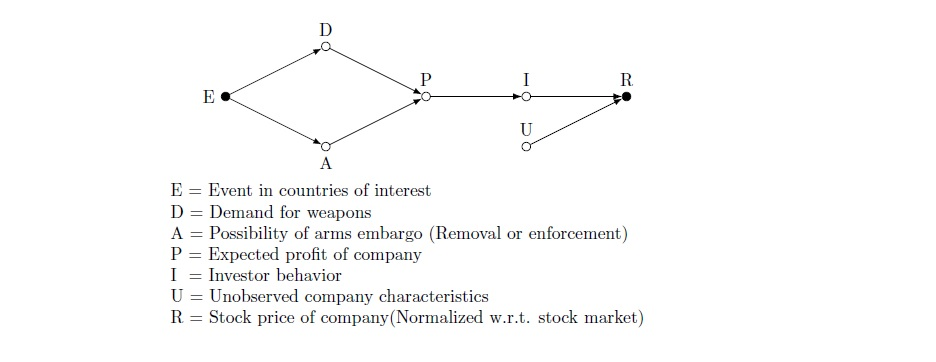

In [1]:
#Causal Graph
from IPython.display import Image
display(Image('files/Causal_graph.jpg'))

Except for company return and event dates, other variables cannot be observed, thus, the main identification is based on the relationship between company return and event dates. A corruption dummy is assigned to companies according to various criterion and analysis is conducted whether to understand the different effects of this dummy on company return.

The companies of interest are considered in two groups as low-cost of embargo violation(high-corruption) and high-cost of embargo violation(low-corruption). This distinction is adequately explained in the companies section.<br>
An event increasing conflict in countries under arms embargo has two effects for companies. For a low-cost embargo violation company; since it increases the demand for illegally traded weapons, the demand for the company's weapons increases consequently increasing the profit of the company. With this expectation, investors take a long position for the companies stocks and increases the price of its stock.  For a high-cost embargo violation company, since it delays the removal of embargo, also the time for that company to operate in that country is postponed. Companies profit is affected and investors behave adversely compared to low-cost of embargo violation firm, consequently decreasing the price of its stock.<br>
On the other hand, an event increasing conflict in countries without arms embargo causes an increase in the demand for weapons but also introduces a possibility for an arms embargo. For low-cost of embargo violation company, both consequences increase its expected profit and with the same mechanism, it causes an increase in the price of its stock. For high-cost of embargo violation firm, the overall effect is ambiguous since the company benefits from high demand but an increase of the probability of embargo deteriorates its expected profit.

## Selection of Countries, Events and Companies

### Countries under Embargo Selection Criteria

(i) The embargo should be imposed after 1980 to guarantee to overlap with return data.<br>
(ii) Existence of at least one salient and unexpected conflict event during the embargo period.<br>
(iii) No large-scale UN or US intervention occurred in the conflict, to diminish the importance of sales.<br><br>
The final dataset includes Angola, Ethiopia and Eritrea, Liberia, Rwanda, Sierra Leone, Somalia, Sudan and former Yugoslavia.<br> The detailed list shared by the Authors can be found [here](https://github.com/HumanCapitalAnalysis/student-project-burakbalaban/blob/master/files/Table_A1.pdf).<br>
Replication Note: Most of the countries had UN or US interventions, however, none of them is considered as large-scale. Only Iraq and Afghanistan are eliminated due to criteria (iii) as mentioned in the paper.

### Event Selection

Criteria;<br>
(i) Important enough to attract the interest of media and investors<br>
(ii) To a first approximation, unanticipated<br>
(iii) Unambiguously increases or diminishes the intensity (and expected duration) of the conflict.

For (i) and (ii), an quantitative selection criteria is developed.<br><br>
**Event Importance** $i_t$ is the average of news on that day and the day after <br>
$i_t\ =\dfrac{n_t+n_{t+1}}{2}$<br><br>
**Event Suprise** $s_t$ is the ratio of the Event Importance to the average daily number of stories in the four days preeceding the event<br>
$s_t\ =\dfrac{(n_{t}+n_{t+1})/2}{(n_{t-1}+n_{t-2}+n_{t-3}+n_{t-4})/4}$<br><br>
Typically events with $i_t \geq 10$ and $s_t \geq 2$ are selected and for (iii) qualitative factors are considered.<br>
The detalied list of events including $i_t$ and $s_t$ shared by the Authors can be found [here](https://github.com/HumanCapitalAnalysis/student-project-burakbalaban/blob/master/files/Table_A2.pdf).

### Companies

The company selection is done with primarily using SIC codes in the Datastream-Worldscope dataset and using the list of top-100 weapon-making companies in a paper published by Stockholm International Peace Research Institute(SIPRI) (J. Paul Dunne and Eamon Surry 2006).<br>
The detailed list of 153 companies included in the paper shared by the Authors can be found [here](https://github.com/HumanCapitalAnalysis/student-project-burakbalaban/blob/master/files/Table_A4.pdf).

#### Company clustering

Regarding company characteristics, various measures are used including <br>
(i) Corruption Perception Index (CPI) of Transparency International for the years 1995–2005;<br>
(ii) Small Arms Trade Transparency Barometer produced by the Small Arms Survey over the years 2004–2006;<br>
(iii) the index of Control of corruption (CC) proposed by Daniel Kaufmann, Aart Kraay, and Massimo Mastruzzi (2006);<br>
(iv) membership in the OECD in 1985;<br>
(v) a measure of press freedom provided by Freedom House;<br>
(vi) the Bribe PayersIndex (BPI), also produced by Transparency International;<br>
(vii) the self-dealing index of Simeon Djankov et al. (2008) as a measure of protection of small shareholders.<br>
The detailed list of measures of the cost of embargo violation, shared by the Authors, can be found [here](https://github.com/HumanCapitalAnalysis/student-project-burakbalaban/blob/master/files/Table_A1.pdf).

#### Return

After dropping penny stocks(stocks with prices less than two units of locals currency), extreme outliers(top and bottom of 2/10,000 of returns) and stocks with the stale price(returns zero for 10 consecutive days) following market model is estimated.

$r_{i,t} = \alpha_{i}+\beta_{i}r_{m(i),t}+\epsilon_{i,t}$<br>
$r_{i,t}$ = Return of Company $i$ on the day $t$<br>
$r_{m(i),t}$ = Return of the Value-Weighted Market Index for the Country in which Company $i$ is traded on the day $t$

Estimating $\hat{\alpha}_{i,t}$ and $\hat{\beta}_{i,t}$ from previous year, abnormal returns is calculated as follows;<br>
$e_{i,t} = r_{i,t}-\hat{\alpha}_{ti,t}-\hat{\beta}_{i,t}r_{m(i),t}$<br>
The main focus is on 3-day cumulative returns;<br>
$e_{i,t}^{(-1,1)} = e_{i,t-1}+e_{i,t}+e_{i,t+1}$<br>
since exact day may does not reflect the impact.<br>

### Main focus and Method

All the regressions and analysis used $e_{i,t}^{(-1,1)}$ as dependent variable and independent variables vary across regressions, formulas can be found under the respective figure.<br>
Primarily, the Ordinary Least Squares method is used for estimation and to avoid the effect of correlation between dates on standard errors, robust standard errors clustered by date is used.

In [2]:
#Libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels
from statsmodels.formula import api
import pysal
import patsy
from statsmodels.iolib import summary2
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

C:\Users\Balaban\Anaconda3\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
C:\Users\Balaban\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


## Examination of Abnormal Returns

In [3]:
#Data
data = pd.read_stata('data/data1985.dta')
for x in range(1986,2004):
    data = data.append(pd.read_stata('data/data'+ str(x) +'.dta'),ignore_index=True)
for x in range(2004,2006):
    data = data.append(pd.read_stata('data/data'+ str(x)+ 'a.dta'),ignore_index=True)
    data = data.append(pd.read_stata('data/data'+ str(x)+ 'b.dta'),ignore_index=True)
data = data.drop(columns="index")
data = data.sort_values(by=["compname","date"])

### Figure 1 - Corruption distinction

Companies are clustered according to the countries of their headquarter's location and those countries differentiated as high-corrupted and low-corrupted by the Corruption Perception Index.

In [4]:
#Generating dummies of interest
evsnoemball1 = np.array(data["evsnoemb"])
evsnoemball= np.empty(len(evsnoemball1))
evsnenoemb = np.array(data["evsnenoemb"])

for i in range(1,len(evsnenoemb)):
    if (evsnenoemb[i]!=0):
        evsnoemball[i] = evsnenoemb[i]
    else:
        evsnoemball[i] = evsnoemball1[i]
        
evsnoemballd2cpi = evsnoemball*data["d2cpi"]
evsnoemballd2nocpi = evsnoemball*(1-data["d2cpi"])
data["evsnoemball"] = evsnoemball
data["evsnoemballd2cpi"] = evsnoemballd2cpi
data["evsnoemballd2nocpi"] = evsnoemballd2nocpi

for x in ["evsemb", "evsembd2cpi","evsembd2nocpi", "evsnoemball", "evsnoemballd2cpi", "evsnoemballd2nocpi"]:
    data["dp1"+ x] = (data[ x ]== 1)*1
    data["dm1"+ x] = (data[ x ]== -1)*1
    
for x in ["evsemb","evsnoemball"]:
    data["d0" + x] = (data[ x ]== 0)*1
    data["d0" + x + "d2cpi"] = ((data[ x ] == 0) & (data["d2cpi"] == 1 ))*1
    data["d0" + x + "d2nocpi"] = ((data[ x ] == 0) & (data["d2cpi"] == 0 ))*1

In [5]:
#Panel A. regression
x = data[["dm1evsembd2nocpi","d0evsembd2nocpi", "dp1evsembd2nocpi", "dm1evsembd2cpi", "d0evsembd2cpi","dp1evsembd2cpi"]]
y = data["aret3ri"]
date = data["date"]
regF11 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#print(regF11.summary(xname=["Low corruption Decrease war", "Low corruption No event", "Low corruption Increase war",
#                           "High corruption Decrease war", "High corruption No event", "High corruption Increase war"]))

In [6]:
#Panel B. regression
x = data[["dm1evsnoemballd2nocpi", "d0evsnoemballd2nocpi", "dp1evsnoemballd2nocpi", "dm1evsnoemballd2cpi", "d0evsnoemballd2cpi", "dp1evsnoemballd2cpi"]]
y = data["aret3ri"]
date = data["date"]
regF12 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#print(regF12.summary2(xname=["Low corruption Decrease war", "Low corruption No event", "Low corruption Increase war",
#                           "High corruption Decrease war", "High corruption No event", "High corruption Increase war"]))

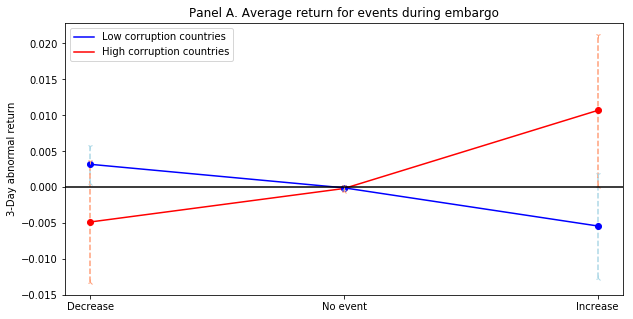

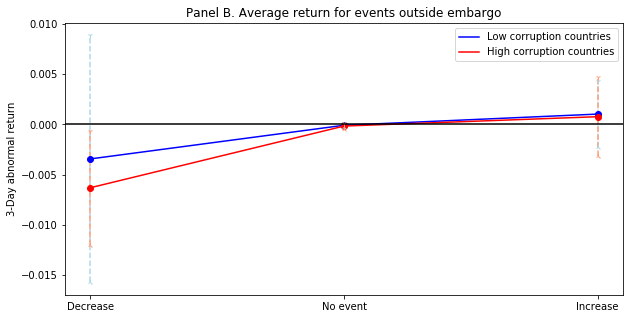

In [7]:
#Plot generation
values = regF11.params
conf_inter = regF11.conf_int(alpha=0.05)

values_low_corrupt = pd.DataFrame(values[["dm1evsembd2nocpi","d0evsembd2nocpi","dp1evsembd2nocpi"]]).transpose()
conf_inter_lowc_l = pd.DataFrame(conf_inter[ 0 ][["dm1evsembd2nocpi","d0evsembd2nocpi","dp1evsembd2nocpi"]]).transpose()
conf_inter_lowc_h = pd.DataFrame(conf_inter[ 1 ][["dm1evsembd2nocpi","d0evsembd2nocpi","dp1evsembd2nocpi"]]).transpose()

values_high_corrupt = pd.DataFrame(values[["dm1evsembd2cpi","d0evsembd2cpi","dp1evsembd2cpi"]]).transpose()
conf_inter_highc_l = pd.DataFrame(conf_inter[ 0 ][["dm1evsembd2cpi","d0evsembd2cpi","dp1evsembd2cpi"]]).transpose()
conf_inter_highc_h = pd.DataFrame(conf_inter[ 1 ][["dm1evsembd2cpi","d0evsembd2cpi","dp1evsembd2cpi"]]).transpose()

col_low_cor = {"dm1evsembd2nocpi":"Decrease","d0evsembd2nocpi":"No event","dp1evsembd2nocpi":"Increase"}
col_high_cor = {"dm1evsembd2cpi":"Decrease","d0evsembd2cpi":"No event","dp1evsembd2cpi":"Increase"}

values_low_cor= values_low_corrupt.rename(columns = col_low_cor ).transpose()
conf_inter_low_cor_l = conf_inter_lowc_l.rename(columns = col_low_cor).transpose()
conf_inter_low_cor_h = conf_inter_lowc_h.rename(columns = col_low_cor).transpose()
values_high_cor = values_high_corrupt.rename(columns = col_high_cor).transpose()
conf_inter_high_cor_l = conf_inter_highc_l.rename(columns = col_high_cor).transpose()
conf_inter_high_cor_h = conf_inter_highc_h.rename(columns = col_high_cor).transpose()


plt.figure(figsize=(10,5))
plt.title('Panel A. Average return for events during embargo')
plt.ylabel('3-Day abnormal return')
plt.plot(values_low_cor,color = 'blue')
plt.plot(values_high_cor,color = 'red')
plt.legend(labels=["Low corruption countries","High corruption countries"])        
plt.plot(values_high_cor,'ro',color = 'red')
plt.plot(values_low_cor,'ro',color = 'blue')
plt.plot(conf_inter_low_cor_l ,'2', color = 'lightblue')
plt.plot(conf_inter_low_cor_h ,'1', color = 'lightblue')
plt.plot(conf_inter_high_cor_l ,'2', color = 'lightsalmon')
plt.plot(conf_inter_high_cor_h ,'1', color = 'lightsalmon')
for a in ["low_cor","high_cor"]:
    for x in ["Decrease","No event","Increase"]:
        color_conf = "lightblue"
        if a == "high_cor": 
            color_conf = "lightsalmon"
        plt.vlines(x, ymax = globals()["conf_inter_"+ a + "_h"][1][x] , ymin = globals()["conf_inter_"+ a + "_l"][0][x],
                  color = color_conf, linestyle = 'dashed')
plt.axhline(y = 0 ,color = 'black')

values_noemb = regF12.params
conf_inter_noemb = regF12.conf_int(alpha=0.05)

values_noemb_low_corrupt = pd.DataFrame(values_noemb[["dm1evsnoemballd2nocpi","d0evsnoemballd2nocpi","dp1evsnoemballd2nocpi"]]).transpose()
conf_inter_noemb_lowc_l = pd.DataFrame(conf_inter_noemb[ 0 ][["dm1evsnoemballd2nocpi","d0evsnoemballd2nocpi","dp1evsnoemballd2nocpi"]]).transpose()
conf_inter_noemb_lowc_h = pd.DataFrame(conf_inter_noemb[ 1 ][["dm1evsnoemballd2nocpi","d0evsnoemballd2nocpi","dp1evsnoemballd2nocpi"]]).transpose()

values_noemb_high_corrupt = pd.DataFrame(values_noemb[["dm1evsnoemballd2cpi","d0evsnoemballd2cpi","dp1evsnoemballd2cpi"]]).transpose()
conf_inter_noemb_highc_l = pd.DataFrame(conf_inter_noemb[ 0 ][["dm1evsnoemballd2cpi","d0evsnoemballd2cpi","dp1evsnoemballd2cpi"]]).transpose()
conf_inter_noemb_highc_h = pd.DataFrame(conf_inter_noemb[ 1 ][["dm1evsnoemballd2cpi","d0evsnoemballd2cpi","dp1evsnoemballd2cpi"]]).transpose()
col_noemb_low_cor = {"dm1evsnoemballd2nocpi":"Decrease","d0evsnoemballd2nocpi":"No event","dp1evsnoemballd2nocpi":"Increase"}
col_noemb_high_cor = {"dm1evsnoemballd2cpi":"Decrease","d0evsnoemballd2cpi":"No event","dp1evsnoemballd2cpi":"Increase"}

values_noemb_low_cor= values_noemb_low_corrupt.rename(columns = col_noemb_low_cor ).transpose()
conf_inter_noemb_low_cor_l = conf_inter_noemb_lowc_l.rename(columns = col_noemb_low_cor).transpose()
conf_inter_noemb_low_cor_h = conf_inter_noemb_lowc_h.rename(columns = col_noemb_low_cor).transpose()
values_noemb_high_cor = values_noemb_high_corrupt.rename(columns = col_noemb_high_cor).transpose()
conf_inter_noemb_high_cor_l = conf_inter_noemb_highc_l.rename(columns = col_noemb_high_cor).transpose()
conf_inter_noemb_high_cor_h = conf_inter_noemb_highc_h.rename(columns = col_noemb_high_cor).transpose()

plt.figure(figsize=(10,5))
plt.title('Panel B. Average return for events outside embargo')
plt.ylabel('3-Day abnormal return')
plt.plot(values_noemb_low_cor,color = 'blue',)
plt.plot(values_noemb_high_cor,color = 'red')
plt.legend(labels=["Low corruption countries","High corruption countries"])
plt.plot(values_noemb_low_cor,'ro',color = 'blue')
plt.plot(values_noemb_high_cor,'ro',color = 'red')
plt.plot(conf_inter_noemb_low_cor_l ,'2', color = 'lightblue')
plt.plot(conf_inter_noemb_low_cor_h ,'1', color = 'lightblue')
plt.plot(conf_inter_noemb_high_cor_l ,'2', color = 'lightsalmon')
plt.plot(conf_inter_noemb_high_cor_h ,'1', color = 'lightsalmon')
for a in ["low_cor","high_cor"]:
    for x in ["Decrease","No event","Increase"]:
        color_conf = "lightblue"
        if a == "high_cor": 
            color_conf = "lightsalmon"
        plt.vlines(x, ymax = globals()["conf_inter_noemb_"+ a + "_h"][1][x] , ymin = globals()["conf_inter_noemb_"+ a + "_l"][0][x],
                  color = color_conf, linestyle = 'dashed')
plt.axhline(y = 0 ,color = 'black')

For Panel A following model is used, yet only for events in the countries under embargo;
$e_{i,t}^{(-1,1)} = \alpha_{1} D_{dec,t} + \alpha_{2} D_{no,t} + \alpha_{3} D_{inc,t}+ \alpha_{4} D_{dec,t}D_{i} + \alpha_{5} D_{no,t} D_{i}+ \alpha_{6} D_{inc,t} D_{i}+ \eta_{i,t}$<br>
$D_{i}$ = Corruption indicator dummy<br>
$D_{inc,t}$ = Event increasing conflict dummy<br>
$D_{dec,t}$ = Event decreasing conflict dummy<br>
$D_{no,t}$ = No event dummy<br>
$\eta_{i,t}$ = Error term<br>
For Panel B. same analysis is conducted using only events in countries outside arms embargo.

Replication Note: Average (equally-weighted) 3-Day abnormal return is regressed on dummies; dates with reducing hostilities(decrease) event, dates with increasing hostilities(increase) event, dates with no events and corruption indicator. Overall, figures are approximately in line with the predictions, yet only a few are statistically significant at the 95% level. In panel A; only the effect of event decreasing conflict on the low-corruption company and the effect of event increasing conflict on the high-corruption firm are significant while more could be expected.

### Figure 2 - Events

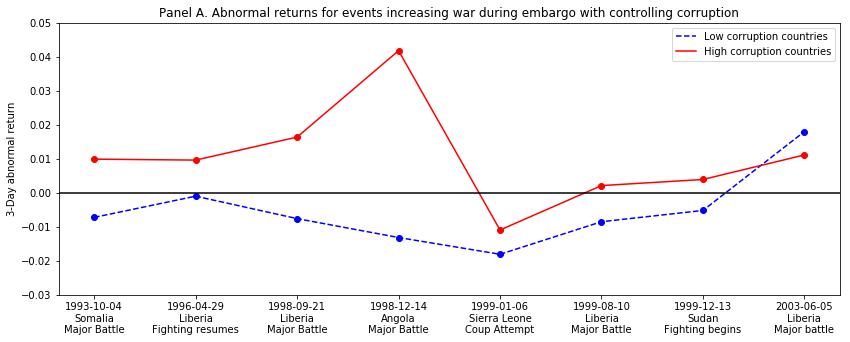

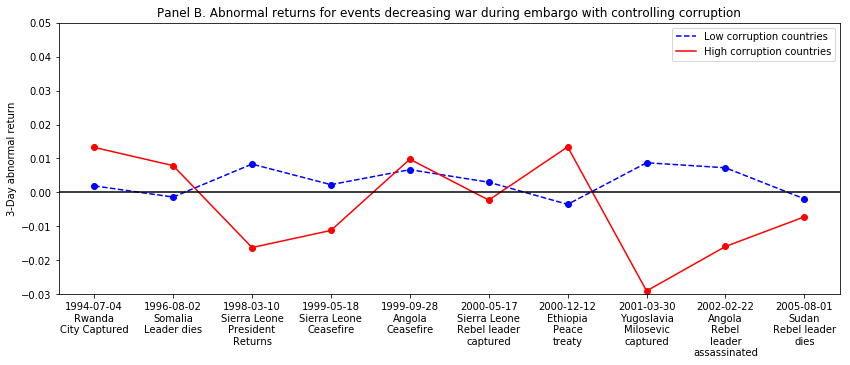

In [8]:
#Regression and plot generation
for i in ["1993-10-04","1996-04-29","1998-09-21","1998-12-14","1999-01-06","1999-08-10","1999-12-13","2003-06-05"]:
    data[ "dpos" + i + "nocpi" ] = ( data[ "date" ] == i ) * data[ "d2nocpi" ]
    data[ "dpos" + i + "cpi"] = ( data [ "date" ] == i ) * data[ "d2cpi" ]
for i in ["1994-07-04","1996-08-02","1998-03-10","1999-05-18","1999-09-28","2000-05-17","2000-12-12","2001-03-30","2002-02-22","2005-08-01"]:
    data[ "dpos" + i + "nocpi" ] = ( data[ "date" ] == i ) * data [ "d2nocpi" ]
    data[ "dpos" + i + "cpi"] = ( data [ "date" ] == i ) * data [ "d2cpi" ]
event_date_col = [col for col in data if col.startswith("dpos") | col.startswith("dneg")]
x = data[event_date_col]
y = data["aret3ri"]
regF121 = statsmodels.formula.api.OLS(y,x).fit(cov_type = "HC0",use_t = True)
#print(regF121.summary())

values = regF121.params
##For increasing war during embargo
inc_dates = ["1993-10-04", "1996-04-29", "1998-09-21", "1998-12-14", "1999-01-06", "1999-08-10", "1999-12-13", "2003-06-05"]
increasing_exp = {inc_dates[0]:"Somalia\nMajor Battle", inc_dates[1]:"Liberia\nFighting resumes",
                  inc_dates[2]:"Liberia\nMajor Battle", inc_dates[3]:"Angola\nMajor Battle",
                  inc_dates[4]:"Sierra Leone\nCoup Attempt", inc_dates[5]:"Liberia\nMajor Battle",
                  inc_dates[6]:"Sudan\nFighting begins", inc_dates[7]:"Liberia\nMajor battle"}
increasing_events_low_cor = pd.DataFrame(columns=["value"])
increasing_events_high_cor = pd.DataFrame(columns=["value"])

for x in inc_dates:
    increasing_events_low_cor = increasing_events_low_cor.append({'value': values["dpos"+ x + "nocpi"]}, ignore_index=True)
    increasing_events_high_cor = increasing_events_high_cor.append({'value': values["dpos"+ x + "cpi"]}, ignore_index = True)

for x in range(8):
    increasing_events_low_cor.rename(index = {x: str(inc_dates[x] +"\n"+ increasing_exp[inc_dates[x]])}, inplace=True)
    increasing_events_high_cor.rename(index = {x: str(inc_dates[x] +"\n"+ increasing_exp[inc_dates[x]])}, inplace=True)
##For decreasing war during embargo
decr_dates = ["1994-07-04", "1996-08-02", "1998-03-10", "1999-05-18", "1999-09-28",
              "2000-05-17", "2000-12-12", "2001-03-30", "2002-02-22", "2005-08-01"]
decreasing_exp = {decr_dates[0]:"Rwanda\nCity Captured", decr_dates[1]: "Somalia\nLeader dies",
                  decr_dates[2]:"Sierra Leone\nPresident\nReturns", decr_dates[3]:"Sierra Leone\nCeasefire",
                  decr_dates[4]:"Angola\nCeasefire", decr_dates[5]:"Sierra Leone\nRebel leader\ncaptured",
                  decr_dates[6]:"Ethiopia\nPeace\ntreaty", decr_dates[7]:"Yugoslavia\nMilosevic\ncaptured",
                  decr_dates[8]:"Angola\nRebel\nleader\nassassinated", decr_dates[9]:"Sudan\nRebel leader\ndies"}
decreasing_events_low_cor = pd.DataFrame(columns=["value"])
decreasing_events_high_cor = pd.DataFrame(columns=["value"])
for x in decr_dates:
    decreasing_events_low_cor = decreasing_events_low_cor.append({'value': values["dpos"+ x + "nocpi"]}, ignore_index=True)
    decreasing_events_high_cor = decreasing_events_high_cor.append({'value': values["dpos"+ x + "cpi"]}, ignore_index = True)

for x in range(10):
    decreasing_events_low_cor.rename(index = {x: str(decr_dates[x] +"\n"+ decreasing_exp[decr_dates[x]])}, inplace=True)
    decreasing_events_high_cor.rename(index = {x: str(decr_dates[x] +"\n"+ decreasing_exp[decr_dates[x]])}, inplace=True)

plt.figure(figsize=[14,5])
plt.title("Panel A. Abnormal returns for events increasing war during embargo with controlling corruption")
plt.ylabel('3-Day abnormal return')
plt.axis(ymin = -0.03, ymax = 0.05)
plt.plot(increasing_events_low_cor, color = 'blue', linestyle= 'dashed')
plt.plot(increasing_events_high_cor, color = 'red')
plt.plot(increasing_events_low_cor, 'ro', color = 'blue')
plt.plot(increasing_events_high_cor, 'ro', color = 'red')
plt.legend(labels=["Low corruption countries","High corruption countries"])
plt.axhline(y=0, color = 'black')

plt.figure(figsize=[14,5])
plt.title("Panel B. Abnormal returns for events decreasing war during embargo with controlling corruption")
plt.ylabel('3-Day abnormal return')
plt.axis(ymin = -0.03, ymax = 0.05)
plt.plot(decreasing_events_low_cor, color = 'blue', linestyle= 'dashed' )
plt.plot(decreasing_events_high_cor, color = 'red')
plt.plot(decreasing_events_low_cor, 'ro', color = 'blue')
plt.plot(decreasing_events_high_cor, 'ro', color = 'red')
plt.legend(labels=["Low corruption countries","High corruption countries"])
plt.axhline(y=0, color = 'black')


In Panel A, following model is used only including events increasing conflict;<br>
$e_{i,t}^{(-1,1)} = \sum_{k=1}^{m}\alpha_{k} E_{k,t} + \sum_{k=1}^{m}\beta_{k} E_{k,t} D_{i}+ \eta_{i,t}$<br>
$m$ = Number of events<br>
$E_{k,t}$ = Dummy for corresponding event<br>
$D_{i}$ = Corruption indicator dummy<br>
$\eta_{i,t}$ = Error term<br>
In Panel B, same specification is used only for events decreasing conflict.

Replication Note: Average (equally-weighted) 3-Day abnormal return is regressed on event-specific dummies and dummy for corruption. The same argument in Figure 1 is still valid, estimated coefficients are essentially in line with predictions excluding several events, most of them are not statistically significant.

### Table 1 - Benchmark Table

In [9]:
#Regression and table generation
#Adding a constant for convenience
data.loc[data["sample1"]==1,"const"] = 1

explanation_main = {"evsemb":"Event during embargo (1=increase,-1=decrease,0=no event)",
                    "evsembd2cpi":"Event during embargo(High-corruption country)",
                    "evsembd2nocpi":"Event during embargo(Low-corruption country)",
                    "d2cpi":"High-corruption country indicator", "const":"Constant"}
#Benchmark Spec. -- Interact with Corruption Index
x = data[["evsemb","evsembd2cpi","d2cpi","const"]]
x = x.rename(columns=explanation_main)
y = data["aret3ri"]
date = data["date"]
regT11 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

#Do only for events
x = data.loc[abs(data["evsemb"])==1, ["evsemb","evsembd2cpi"]]
x = x.rename(columns = explanation_main)
y = data.loc[abs(data["evsemb"])==1, "aret3ri"]
date = data.loc[abs(data["evsemb"])==1,"date"]
regT12 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

#Do for Corrupt and non-Corrupt
x = data[["evsembd2cpi","evsembd2nocpi","d2cpi","const"]]
x = x.rename(columns=explanation_main)
y = data["aret3ri"]
date = data["date"]
regT13 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table1 = summary2.summary_col([regT11,regT12,regT13],stars = True,
                              regressor_order=["Event during embargo (1=increase,-1=decrease,0=no event)",
                                               "Event during embargo(High-corruption country)",
                                               "Event during embargo(Low-corruption country)",
                                               "High-corruption country indicator","Constant"],
                              info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                              model_names = ['(1)','(2)','(3)'])
table1.add_title("Stock Market Reaction to War Events")

print(table1)

                         Stock Market Reaction to War Events
                                                            (1)       (2)       (3)   
--------------------------------------------------------------------------------------
Event during embargo (1=increase,-1=decrease,0=no event) -0.0042** -0.0042**          
                                                         (0.0018)  (0.0019)           
Event during embargo(High-corruption country)            0.0115*** 0.0115**  0.0073** 
                                                         (0.0041)  (0.0042)  (0.0034) 
Event during embargo(Low-corruption country)                                 -0.0042**
                                                                             (0.0018) 
High-corruption country indicator                        -0.0001             -0.0001  
                                                         (0.0002)            (0.0002) 
Constant                                                 -0.0001     

Specification 1 (also primarily used in other tables and figures);<br>
$e_{i,t}^{(-1,1)} = \alpha + \gamma Emb_{t} + \alpha_{D} D_{i} + \gamma^{D} Emb_{t} D_{i} + \eta_{i,t}$<br>
Specification 2(Only includes dates with events increasing or decreasing conflict);<br>
$e_{i,t}^{(-1,1)} =  \beta_{h} Emb_{t} D_{high} + \beta^{l} Emb_{t} D_{low} + \eta_{i,t}$<br>
Specification 3;<br>
$e_{i,t}^{(-1,1)} = \alpha + \alpha_{D} D_{i} + \beta^{h} Emb_{t} D_{high} + \beta^{l} Emb_{t} D_{low} + \eta_{i,t}$<br>
$Emb_{t}$ = Event in embargo dummy (for increasing conflict events 1, decreasing conflict events -1 and 0 otherwise.<br>
$D_{i}$ = Corruption indicator dummy<br>
$D_{high}$ = Dummy for high-corruption company<br>
$D_{low}$ = Dummy for low-corruption company<br>
$\eta_{i,t}$ = Error term<br>

Average (equally-weighted) 3-Day abnormal return is regressed on dummy variables indicating the corruption state of the company(according to CPI of the country where its headquarters in) and event dummy. As can be seen from the table, both events and corruption indicator have significant explanatory power for abnormal return.

### Table 2 - Various Measures of Cost of Illegal Trade

In [10]:
##Table generation for both Panel A and B
explanation = {"evsemb":"Event during embargo", "const":"Constant"}
for x in ["d2cpi","d2corrk","d2transp","now", "d2pressfr", "d2bpi06", "d2nodeal",
          "stcpi", "stcorrk", "sttransp", "stpressfr", "stbpi06", "stnodeal"]:
    new = {str("evsemb"+ x):"Event during embargo (High corr)",
              x:"Low cost of embargo violation, indicator",}
    explanation.update(new)
#Interact with Corruption Index
x = data[["evsemb", "evsembd2cpi", "d2cpi","const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data["date"]
reg2A1 = statsmodels.formula.api.OLS(y,x).fit(cov_type = 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Corruption according to Kaufman
x = data[["evsemb", "evsembd2corrk", "d2corrk","const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data["date"]
reg2A2 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Transparency Index
x = data[["evsemb", "evsembd2transp", "d2transp", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["d2transp"]) <= 1,"date"]
reg2A3 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Western company
x = data[["evsemb", "evsembnow", "now", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["now"]) <= 1,"date"]
reg2A4 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Press Freedom
x = data[["evsemb", "evsembd2pressfr", "d2pressfr", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["d2pressfr"]) <= 1,"date"]
reg2A5 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Bribepayer
x = data[["evsemb", "evsembd2bpi06", "d2bpi06", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["d2bpi06"]) <= 1,"date"]
reg2A6 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Self-Dealing Index
x = data[["evsemb", "evsembd2nodeal", "d2nodeal", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["d2nodeal"]) <= 1,"date"]
reg2A7 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table2A = summary_col([reg2A1,reg2A2,reg2A3,reg2A4,reg2A5,reg2A6,reg2A7],stars = True,
                      info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                      model_names=["High\ncorruption\npercept.\nindex",
                                  "Control of\ncorruption\nindex", "Low\ntransparency\nof arms\ntrade",
                                  "Non\nOECD\nmember","Low\npress\nfreedom", "High\nbribe-payer\nindex",
                                  "High\nself-dealing\nindex"])
                     
##PANEL B. Continuous variables
#Interact with Corruption Variable
x = data[["evsemb", "evsembstcpi", "stcpi", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data["date"]
reg2B1 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Corruption according to Kaufman
x = data[["evsemb", "evsembstcorrk", "stcorrk", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data["date"]
reg2B2 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Transparency Index
x = data[["evsemb", "evsembsttransp", "sttransp", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["sttransp"]) <= 3,"date"]
reg2B3 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Press Freedom
x = data[["evsemb", "evsembstpressfr", "stpressfr", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data["date"]
reg2B5 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Bribepayer
x = data[["evsemb", "evsembstbpi06", "stbpi06", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data.loc[abs(data["stbpi06"]) <= 2,"date"]
reg2B6 = statsmodels.formula.api.OLS(y,x,missing = "drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Shleifer Index
x = data[["evsemb", "evsembstnodeal", "stnodeal", "const"]]
x = x.rename(columns = explanation)
y = data["aret3ri"]
date = data["date"]
reg2B7 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table2B = summary_col([reg2B1,reg2B2,reg2B3,reg2B5,reg2B6,reg2B7],stars = True,
                      info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                      model_names=["High\ncorruption\npercept.\nindex",
                                  "Control of\ncorruption\nindex", "Low\ntransparency\nof arms\ntrade",
                                  "Low\npress\nfreedom", "High\nbribe-payer\nindex", "High\nself-dealing\nindex"])
table2A.add_title("Panel A. Indicators for cost of embargo violation")
table2B.add_title("Panel B. Standardized continuous variables for cost of embargo violation" )
print(table2A)
print(table2B)

                                   Panel A. Indicators for cost of embargo violation
                                            High    Control of     Low         Non      Low        High        High    
                                         corruption corruption transparency    OECD    press   bribe-payer self-dealing
                                          percept.    index      of arms      member  freedom     index       index    
                                           index                  trade                                                
-----------------------------------------------------------------------------------------------------------------------
Event during embargo                     -0.0042**  -0.0042**  -0.0043**    -0.0031*  -0.0023  -0.0027     -0.0025     
                                         (0.0018)   (0.0019)   (0.0020)     (0.0017)  (0.0017) (0.0017)    (0.0015)    
Event during embargo (High corr)         0.0115***  0.0117***  0.0114***   

Both panels use the same model specification but second panel uses indices' continuous forms.<br>
$e_{i,t}^{(-1,1)} = \alpha + \gamma Emb_{t} + \alpha_{D} S_{i} + \gamma^{D} Emb_{t} S_{i} + \eta_{i,t}$<br>
$Emb_{t}$ = Event in embargo dummy (-1, 0 or 1)<br>
$S_{i}$ = Dummy for different indices (Panel A)<br>
$S_{i}$ = Continuous index value for company i (Panel B)<br>

Not only CPI also used for benchmark table having explanatory power, but also Corruption index defined by Kaufman (2006), Transparency Index (Small arms Survey) and being OECD member have significant explanatory power when interacting with the event dummy. Rest of the indices does not seem to be statistically significant (Freedom House; Transparency International; Djankov et al. (2008)).

### Table 3 - Event Selection

In [11]:
#For different event selection procedures
#With standard event definition
explanation_evnt = {'evsemb':'Event during embargo (event ind.)',
                    'evsembd2cpi':'Event during embargo(High-corruption)',
                    'evlemb':'Event during embargo(broad defn) (event ind.)',
                    'evlembd2cpi':'Event during embargo(broad defn) (High-corruption)',
                    'evs2emb':'Event during embargo(automatic defn) (event ind.)',
                    'evs2embd2cpi':'Event during embargo(automatic defn) (High-corruption)',
                    'evs3emb':'Event during embargo(automatic defn) (event ind.)',
                    'evs3embd2cpi':'Event during embargo(automatic defn) (High-corruption)',
                    'd2cpi':'Indicator for high-corruption','const':'Constant'}
x = data[["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_evnt)
y = data["aret3ri"]
date = data["date"]
reg31 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Do with weak event definition
x = data[["evlemb", "evlembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_evnt)
y = data["aret3ri"]
date = data["date"]
reg32 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Do with both event definitions
x = data[["evsemb", "evsembd2cpi","evlemb", "evlembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_evnt)
y = data["aret3ri"]
date = data["date"]
reg33 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
# Do with "automated" event definition -- s2
x = data[["evs2emb", "evs2embd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_evnt)
y = data["aret3ri"]
date = data["date"]
reg34 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Do with "automated" event definition -- s3
x = data[["evs3emb", "evs3embd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_evnt)
y = data["aret3ri"]
date = data["date"]
reg35 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table3 = summary_col([reg31,reg32,reg33,reg34,reg35],stars=True,
                     info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                     model_names=['(1)','(2)','(3)','(4)','(5)'])
table3.add_title("Stock Market Reaction: Event Selection")
print(table3)

                                Stock Market Reaction: Event Selection
                                                          (1)       (2)      (3)       (4)       (5)   
-------------------------------------------------------------------------------------------------------
Constant                                               -0.0001   -0.0001   -0.0001  -0.0001   -0.0001  
                                                       (0.0001)  (0.0001)  (0.0001) (0.0001)  (0.0001) 
Event during embargo (event ind.)                      -0.0042**           -0.0036                     
                                                       (0.0018)            (0.0026)                    
Event during embargo(High-corruption)                  0.0115***           0.0096**                    
                                                       (0.0041)            (0.0048)                    
Event during embargo(automatic defn) (High-corruption)                              0.0086*** 0.0

The same model in the benchmark table specification 1 is used, however with including different events in the set of events increasing or decreasing conflict depending on the selection criteria for events. In column 1, the same set of 18 events in the benchmark table is used. In column 2 and 3, a broader set of 35 events is used with loosening the criteria for event selection. In column 4 and 5, included events are subject to stricter criteria; event suprise>=2 and importance>=10; event suprise>=3 and importance>=10 respectively. Specification 4 includes 21 and specification 5 includes 10 events. The table indicates that selected events perform relatively better in terms of explanatory power.

### Figure 3 - Timing of Effect

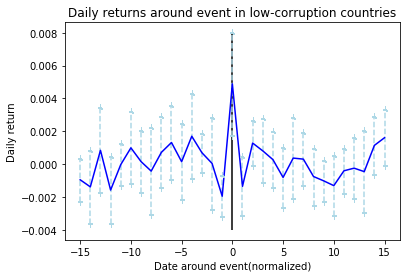

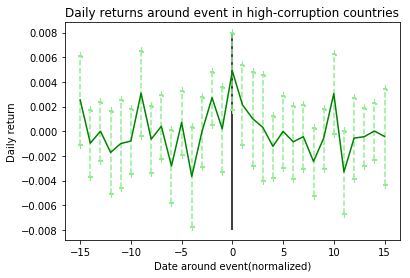

In [12]:
#
x = data[["d2cpi", "const"]]
y = data["aretri"]
date = data["date"]
reg31 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

x = data[["evsembd2cpi", "evsembd2nocpi", "d2cpi" ,"const"]]
for i in ["m","p"]:
    for _ in range(1,16):
        mark = i + str(_)
        locals()["evsemb"+ mark + "d2cpi"] = pd.DataFrame(data["evsemb"+ mark] * data["d2cpi"],
                                                          columns = [str("evsemb"+ mark + "d2cpi")])
        locals()["evsemb"+ mark + "d2nocpi"] = pd.DataFrame(data["evsemb"+ mark] * (1-data["d2cpi"]),
                                                            columns = [str("evsemb"+ mark + "d2nocpi")])
        x =x.join(locals()["evsemb"+ mark + "d2cpi"])
        x =x.join(locals()["evsemb"+ mark + "d2nocpi"])
        
y = data["aretri"]
date = data.loc[x.dropna().index , "date"]
reg32 = statsmodels.formula.api.OLS(y,x , missing = 'drop').fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#For High corruption countries
corrupt = pd.DataFrame(columns=["value","c_low","c_high"], index = range(1,32))
conf_inter = reg32.conf_int(alpha=0.05)
i = 1
for _ in reversed(range(1,16)):
    corrupt["value"][i] = reg32.params["evsembp"+ str(_) + "d2cpi"]
    corrupt["c_low"][i] = conf_inter[ 0 ]["evsembp"+ str(_) + "d2cpi"]
    corrupt["c_high"][i] = conf_inter [ 1 ]["evsembp"+ str(_) + "d2cpi"]
    i = i + 1

corrupt["value"][i] = reg32.params["evsembd2cpi"]
corrupt["c_low"][i] = conf_inter [ 0 ]["evsembd2cpi"]
corrupt["c_high"][i] = conf_inter [ 1 ]["evsembd2cpi"]
i = i + 1

for _ in range(1,16):
    corrupt["value"][i] = reg32.params["evsembm"+ str(_) + "d2cpi"]
    corrupt["c_low"][i] = conf_inter[ 0 ]["evsembm"+ str(_) + "d2cpi"]
    corrupt["c_high"][i] = conf_inter[ 1 ]["evsembm"+ str(_) + "d2cpi"]
    i = i + 1
#For low corruption countries
no_corrupt = pd.DataFrame(columns=["value","c_low","c_high"], index = range(1,32))
conf_inter = reg32.conf_int(alpha=0.05)
i = 1
for _ in reversed(range(1,16)):
    no_corrupt["value"][i] = reg32.params["evsembp"+ str(_) + "d2nocpi"]
    no_corrupt["c_low"][i] = conf_inter[ 0 ]["evsembp"+ str(_) + "d2nocpi"]
    no_corrupt["c_high"][i] = conf_inter [ 1 ]["evsembp"+ str(_) + "d2nocpi"]
    i = i + 1

no_corrupt["value"][i] = reg32.params["evsembd2cpi"]
no_corrupt["c_low"][i] = conf_inter [ 0 ]["evsembd2cpi"]
no_corrupt["c_high"][i] = conf_inter [ 1 ]["evsembd2cpi"]
i = i + 1

for _ in range(1,16):
    no_corrupt["value"][i] = reg32.params["evsembm"+ str(_) + "d2nocpi"]
    no_corrupt["c_low"][i] = conf_inter[ 0 ]["evsembm"+ str(_) + "d2nocpi"]
    no_corrupt["c_high"][i] = conf_inter[ 1 ]["evsembm"+ str(_) + "d2nocpi"]
    i = i + 1

i = 1
for _ in range(-15,16,1):
    corrupt = corrupt.rename(index = {i:_})
    no_corrupt = no_corrupt.rename(index = {i:_})
    i = i + 1
plt.figure()
plt.vlines(x=0, ymin = -0.004, ymax = 0.008)
plt.plot(no_corrupt["value"][list(range(-15,16,1))],color = "blue")
plt.title("Daily returns around event in low-corruption countries")
plt.ylabel("Daily return")
plt.xlabel("Date around event(normalized)")
for _ in range(-15,16,1):
    plt.vlines( x = _ , ymax = no_corrupt["c_high"][_], ymin = no_corrupt["c_low"][_], color = 'lightblue' , linestyles= 'dashed')
    plt.plot(no_corrupt["c_low"][list(range(-15,16,1))], '1', color = 'lightblue')
    plt.plot(no_corrupt["c_high"][list(range(-15,16,1))], '2', color = 'lightblue')

plt.figure()
plt.vlines(x=0, ymin = -0.008, ymax = 0.008)
plt.plot(corrupt["value"][list(range(-15,16,1))],color = "green")
plt.title("Daily returns around event in high-corruption countries")
plt.ylabel("Daily return")
plt.xlabel("Date around event(normalized)")
for _ in range(-15,16,1):
    plt.vlines( x = _ , ymax = corrupt["c_high"][_], ymin = corrupt["c_low"][_], color = 'lightgreen' , linestyles= 'dashed')
    plt.plot(corrupt["c_low"][list(range(-15,16,1))], '1', color = 'lightgreen')
    plt.plot(corrupt["c_high"][list(range(-15,16,1))], '2', color = 'lightgreen')


Following model used for examining the effect of events and surrounding 14 days on abnormal return;
$e_{i,t} = \sum_{j=-15}^{+15}\gamma_{j}Emb_{t+j}(1-D_{i}) + \alpha_{D} D_{i}+ \sum_{j=-15}^{+15}\gamma_{j}^{D}Emb_{t+j}D_{i} + \eta_{i,t}$<br>
$Emb_{t}$ = Event in embargo dummy (for increasing conflict events 1, decreasing conflict events -1 and 0 otherwise)<br>
$D_{i}$ = Corruption indicator dummy<br>

Confidence intervals at 95% level are calculated to examine the effect extensively; as can be seen both for low-corruption and high corruption companies line has its pique on the day of the event supporting the main claim of the paper.

### Table 4 - Company Characteristics

In [13]:
#For different classifications of companies
#Table with small companies
x = data.loc[data["drevq1"] == 1, ["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_main)
y = data.loc[data["drevq1"] == 1,"aret3ri"]
date = data.loc[data["drevq1"] == 1,"date"]
reg411 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#large companies
x = data.loc[data["drevq1"] == 0, ["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_main)
y = data.loc[data["drevq1"] == 0,"aret3ri"]
date = data.loc[data["drevq1"] == 0,"date"]
reg412 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#By type of arms
##Ammunition
x = data.loc[data["sampleamms"] == 1, ["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_main)
y = data.loc[data["sampleamms"] == 1,"aret3ri"]
date = data.loc[data["sampleamms"] == 1,"date"]
reg421 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
##Missiles
x = data.loc[data["samplemisss"] == 1, ["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_main)
y = data.loc[data["samplemisss"] == 1,"aret3ri"]
date = data.loc[data["samplemisss"] == 1,"date"]
reg422 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Tanks
x = data.loc[data["sampletanks"] == 1, ["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_main)
y = data.loc[data["sampletanks"] == 1,"aret3ri"]
date = data.loc[data["sampletanks"] == 1,"date"]
reg423 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Explosives
x = data.loc[data["sampleexps"] == 1, ["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_main)
y = data.loc[data["sampleexps"] == 1,"aret3ri"]
date = data.loc[data["sampleexps"] == 1,"date"]
reg424 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table4 = summary_col([reg411,reg412,reg421,reg422,reg423,reg424],stars=True,
                     info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                     model_names=['Small firms','Large Firms','Small arms &\nAmmunition','Missiles','Tanks','Explosives'])
table4.add_title("Stock Market Reaction by Firm Characteristics")
print(table4)

                                      Stock Market Reaction by Firm Characteristics
                                                         Small firms Large Firms Small arms & Missiles  Tanks   Explosives
                                                                                  Ammunition                              
--------------------------------------------------------------------------------------------------------------------------
Event during embargo (1=increase,-1=decrease,0=no event) -0.0100***  -0.0024     -0.0048      -0.0056  -0.0049  -0.0076   
                                                         (0.0030)    (0.0018)    (0.0035)     (0.0036) (0.0042) (0.0049)  
Event during embargo(High-corruption country)            0.0200***   0.0075*     0.0099*      0.0290   0.0046   0.0137    
                                                         (0.0052)    (0.0042)    (0.0056)     (0.0186) (0.0046) (0.0084)  
High-corruption country indicator                      

While using the main specification, different sample set of companies included in the analysis. Company characteristics are indicated in the label. The response of small companies draws attention since its profits from illegal trade probably constitute a larger share of its balance sheet.

### Table 5 - Events in Non-embargo Countries

In [14]:
#
#Table NoEmb -- Results outside embargo
explanation_noemb = {"evsemb":"Event during embargo (event ind.)",
                     "evsembd2cpi":"Event during embargo (High-corruption)",
                     "evsembd2transp":"Event during embargo (High-corruption)",
                     "evsnoemb":"Event outside embargo (event ind.)",
                     "evsnoembd2cpi":"Event outside embargo (High-corruption)",
                     "evsnoembd2transp":"Event outside embargo (High-corruption)",
                     "evsnenoemb":"Event in countries without embargo (event ind.)",
                     "evsnenoembd2cpi":"Event in countries without embargo (High-corruption)",
                     "evsnenoembd2transp":"Event in countries without embargo (High-corruption)",
                     "d2cpi":"Indicator for low-cost of embargo violation",
                     "d2transp":"Indicator for low-cost of embargo violation",
                    "const":"Constant"}

x = data[["evsemb", "evsnoemb", "evsnenoemb","evsembd2cpi", "evsembd2transp", "evsnoembd2cpi","evsnoembd2transp",
          "evsnenoembd2cpi", "evsnenoembd2transp","d2cpi", "d2transp", "const"]]
x = x.rename(columns=explanation_noemb)
y = data["aret3ri"]
date = data.loc[data["d2transp"]>= min(data["d2transp"]),"date"]
reg51 = statsmodels.formula.api.OLS(y,x, missing="drop").fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Basic spec
x = data[["evsemb", "evsnoemb", "evsnenoemb", "const"]]
x = x.rename(columns=explanation_noemb)
y = data["aret3ri"]
date = data["date"]
reg52 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Corruption Index
x = data[["evsemb", "evsembd2cpi", "evsnoemb", "evsnoembd2cpi", "evsnenoemb", "evsnenoembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_noemb)
y = data["aret3ri"]
date = data["date"]
reg53 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Transparency Index
x = data[["evsemb", "evsembd2transp", "evsnoemb", "evsnoembd2transp", "evsnenoemb", "evsnenoembd2transp", "d2transp", "const"]]
x = x.rename(columns=explanation_noemb)
y = data["aret3ri"]
date = data.loc[data["d2transp"]>= min(data["d2transp"]),"date"]
reg54 = statsmodels.formula.api.OLS(y,x, missing = 'drop').fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table5 = summary_col([reg52,reg53,reg54],stars=True,
                     regressor_order=["Event during embargo (event ind.)",
                                      "Event during embargo (High-corruption)",
                                      "Event outside embargo (event ind.)",
                                      "Event outside embargo (High-corruption)",
                                      "Event in countries without embargo (event ind.)",
                                      "Event in countries without embargo (High-corruption)",
                                      "Indicator for low-cost of embargo viaolation",
                                      "Constant"],
                     info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                     model_names=['(1)','(2)','(3)'])
table5.add_title("Stock Market Reaction to Events Outside the Embargo")
print(table5)

               Stock Market Reaction to Events Outside the Embargo
                                                       (1)       (2)       (3)   
---------------------------------------------------------------------------------
Event during embargo (event ind.)                    -0.0010  -0.0042** -0.0043**
                                                     (0.0015) (0.0018)  (0.0020) 
Event during embargo (High-corruption)                        0.0115*** 0.0114***
                                                              (0.0041)  (0.0042) 
Event outside embargo (event ind.)                   0.0001   0.0003    0.0000   
                                                     (0.0021) (0.0026)  (0.0025) 
Event outside embargo (High-corruption)                       -0.0008   0.0005   
                                                              (0.0038)  (0.0031) 
Event in countries without embargo (event ind.)      0.0025   0.0023    0.0023   
                               

Following specification is used for identifying the effect of events also in countries without arms embargo and selected countries outside embargo period (Column 2 and 3);<br>
$e_{i,t}^{(-1,1)} = \alpha + \alpha_{D} D_{i} + \gamma Emb_{t} + \gamma^{D} Emb_{t} D_{i} +
\delta Out_{t}+\delta^{D} Out_{t}D_{i}+ \beta NoEmb_{t} + \beta^{D}NoEmb_{t} D_{i} + \eta_{i,t}$<br>
$D_{i}$ = Corruption indicator dummy<br>
$Emb_{t}$ = Event in embargo dummy (-1, 0 or 1)<br>
$Out_{t}$ = Events in countries subject to arms embargo but conflict not-happened in embargo period dummy (-1, 0 or 1)<br>
$NoEmb_{t}$ = Events in countries not subject to arms embargo (-1, 0 or 1)<br>
For column 1, $\alpha_{D} = \gamma^{D}=\delta^{D}=\beta^{D}=0$ restriction is applied.<br>
In column 2 and 3, Corruption Perception Index and Low Transparency of Arms Trade is used respectively.

Besides events in countries under an arms embargo, other events do not seem to affect the abnormal returns of companies, since the related coefficients are not statistically significant with using both corruption indices.

## Robustness Check

### Robustness Table

In [15]:
#
explanation_robust = {"evsemb":"Event during embargo (event ind.)",
                     "evsembd2cpi":"Event during embargo (High-corruption)",
                     "evsemblngdp":"Event during embargo (Log GDP in 2000$)",
                     "d2cpi":"High corruption country indicator",
                     "lngdp":"Log GDP in 2000$",
                     "const":"Constant"}
#Main spec
x = data[["evsemb", "evsembd2cpi", "d2cpi", "const"]]
x = x.rename(columns=explanation_robust)
y = data["aret3ri"]
date = data["date"]
regT51 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Interact with Corruption Index and ln GDP
x = data[["evsemb", "evsembd2cpi","evsemblngdp", "d2cpi", "const","lngdp"]]
x = x.rename(columns=explanation_robust)
y = data["aret3ri"]
date = data["date"]
regT52 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Other clustering
x = data[["evsemb", "evsembd2cpi","d2cpi", "const"]]
x = x.rename(columns=explanation_robust)
y = data["aret3ri"]
compname = data["compname"]
regT53 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':compname},use_t = True)
# Non-Stale
x = data.loc[data["dstalecompyr"]==0,["evsemb", "evsembd2cpi","d2cpi", "const"]]
x = x.rename(columns=explanation_robust)
y = data.loc[data["dstalecompyr"]==0,"aret3ri"]
date = data.loc[data["dstalecompyr"]==0,"date"]
regT54= statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#For (0,1) result
x = data[["evsemb", "evsembd2cpi","d2cpi", "const"]]
x = x.rename(columns=explanation_robust)
y = data["aret2ri"]
date = data["date"]
regT55 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Raw returns
x = data[["evsemb", "evsembd2cpi","d2cpi", "const"]]
x = x.rename(columns=explanation_robust)
y = data["ret3ri"]
date = data["date"]
regT56 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Net returns
x = data[["evsemb", "evsembd2cpi","d2cpi", "const"]]
x = x.rename(columns=explanation_robust)
y = data["eret3ri"]
date = data["date"]
regT57 = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
table5 = summary_col([regT51,regT52,regT53,regT54,regT55,regT56,regT57],stars=True,
                     info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                      regressor_order=["Event during embargo (event ind.)",
                                      "Event during embargo (High-corruption)",
                                      "Event during embargo (Log GDP in 2000$)",
                                      "High corruption country indicator",
                                       "Log GDP in 2000$","Constant"],
                     model_names=['Main spec.','Log GDP','Cluster by\nCompany','Excl. Stale\nCompanies',
                                  '2-Day Abn.\nReturns\n(0,1)', '3-Day Raw\nReturns\n(-1,1)','3-Day Excess\nReturns\n(-1,1)'])
table5.add_title("Stock Market Reaction to War Events: Robustness")
print(table5)

                                  Stock Market Reaction to War Events: Robustness
                                        Main spec. Log GDP  Cluster by Excl. Stale 2-Day Abn. 3-Day Raw 3-Day Excess
                                                             Company    Companies   Returns    Returns    Returns   
                                                                                     (0,1)      (-1,1)     (-1,1)   
--------------------------------------------------------------------------------------------------------------------
Event during embargo (event ind.)       -0.0042**  0.0092   -0.0042*** -0.0042**   -0.0023    -0.0045*  -0.0046**   
                                        (0.0018)   (0.0342) (0.0013)   (0.0018)    (0.0014)   (0.0024)  (0.0022)    
Event during embargo (High-corruption)  0.0115***  0.0105** 0.0115***  0.0113***   0.0093***  0.0120**  0.0117***   
                                        (0.0041)   (0.0046) (0.0036)   (0.0039)    (0.0031)   (0.00

Table 5 includes regressions for robustness check for the primarily used model. In column 1, logged GDP of countries included in the regressors and can be seen it does not have a significant effect. In column 2, instead of generating robust standard errors clustering by date, companies are used for clustering to see the effect of autocorrelation and estimations do not change, yet standard errors are smaller compared to the main specification. In column 3, more restricted criteria for including stocks is adopted and still no significant change is observed. In column 4, averaged abnormal return in the event day and next day is considered as the dependent variable and despite a noteworthy change in $\gamma$ coefficient for low-corruption companies $\gamma_D$ does not change drastically or lose its significance. More detailed investigation of which days to include in dependant variable can be found in the following section of Timing Effects. In column 5 and 6, the dependent variable is chosen to be non-market-corrected returns and market return subtracted return respectively. Still, it does not have a consequential effect.

### Timing Effects

In [16]:
#Cumulative response validity check
liste = []
for _ in ["m2","m1","","p1","p2"]:
    x = data[["evsemb", "evsembd2cpi", "d2cpi" ,"const"]]
    x = x.rename(columns=explanation_main)
    y = data["aretri"+ _ ]
    date = data.loc[y.notna(), "date"]
    reg6 = statsmodels.formula.api.OLS(y,x, missing = 'drop').fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
    liste.append(reg6)
table6 = summary_col(liste, stars = True, info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                     model_names=['(-2,-2)','(-1,-1)','(0,0)','(1,1)','(2,2)'])
table6.add_title("Timing of Stock Market Reaction")
print(table6)

                                    Timing of Stock Market Reaction
                                                         (-2,-2)   (-1,-1)     (0,0)    (1,1)    (2,2)  
--------------------------------------------------------------------------------------------------------
Event during embargo (1=increase,-1=decrease,0=no event) 0.0003   -0.0019*** -0.0009   -0.0013  0.0016**
                                                         (0.0015) (0.0007)   (0.0012)  (0.0009) (0.0007)
Event during embargo(High-corruption country)            0.0023   0.0022     0.0058*** 0.0034*  -0.0006 
                                                         (0.0017) (0.0020)   (0.0019)  (0.0020) (0.0024)
High-corruption country indicator                        -0.0001  -0.0000    -0.0000   -0.0000  -0.0000 
                                                         (0.0001) (0.0001)   (0.0001)  (0.0001) (0.0001)
Constant                                                 -0.0000  -0.0000    -0.0000   -0.00

The same specification as in the benchmark model is used but the dependent variable is corrected stock return rather than averaged 3-day response. As can be seen, 3-day average(equally-weighted) return based analysis is necessary to examine the effect in full extent since event shows its effect on abnormal returns in the second following day or the first preceding day.

### Placebo Treatment - Market Returns

In [17]:
#Market return as dependent variable
x = data[["evsemb", "evsembd2cpi", "d2cpi", "const"]]
y = data["ret3li"]
date = data["date"]
reg_pla = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
print(reg_pla.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret3li   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.9616
Date:                Sun, 04 Aug 2019   Prob (F-statistic):              0.410
Time:                        02:15:35   Log-Likelihood:             1.2117e+06
No. Observations:              492569   AIC:                        -2.423e+06
Df Residuals:                  492565   BIC:                        -2.423e+06
Df Model:                           3                                         
Covariance Type:              cluster                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
evsemb          0.0001      0.003      0.044      

Model in the benchmark table is used with the return of the market in which each company is traded in as the dependent variable. Particularly, the response of the market to above-mentioned events is examined and as can be observed, market return is not affected by those events and dummies have statistically insignificant coefficients. Therefore, the aforementioned results are not related to unobserved shocks of events on market return.

### Temporal Placebo

Text(0.5,0,'Estimated coefficient')

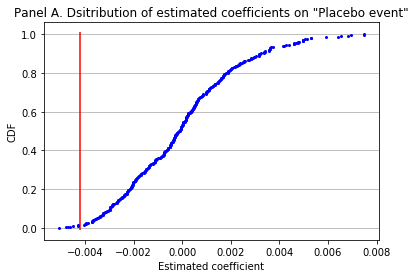

In [18]:
#Gamma
liste_l = []
liste_h = []
for mark in ["m","p"]:
    for _ in range(3,201):
        evsembPlac = data["evsemb"+ mark + str(_)]
        evsembPlacd2cpi = data["evsemb"+ mark + str(_)] * data["d2cpi"]
        x = data[["d2cpi","const"]]
        x = x.join([evsembPlac, evsembPlacd2cpi])
        x.columns = ["d2cpi","const","evsembPlac", "evsembPlacd2cpi"]
        y = data["aret3ri"]
        date = data.loc[x.dropna().index,"date"]
        reg = statsmodels.formula.api.OLS(y,x, missing = 'drop').fit(cov_type = 'cluster', cov_kwds = {'groups':date}, use_t = True)
        liste_l.append(reg.params["evsembPlac"])
        liste_h.append(reg.params["evsembPlacd2cpi"])

liste_l = pd.Series(liste_l)
liste_l = liste_l.sort_values()
liste_l[len(liste_l)]=liste_l.iloc[-1]
cum_dist = np.linspace(0,1,len(liste_l))
liste_cdf_l = pd.Series(cum_dist,index=liste_l)
liste_h = pd.Series(liste_h)
liste_h = liste_h.sort_values()
liste_h[len(liste_h)]=liste_h.iloc[-1]
cum_dist = np.linspace(0,1,len(liste_h))
liste_cdf_h = pd.Series(cum_dist,index=liste_h)
plt.figure()
plt.plot(liste_cdf_l,'ro',color="blue",markersize=2)
plt.vlines(x = -0.0042 , color ="r",ymin=-0.01,ymax=1.01)
plt.grid(axis='y')
plt.title('Panel A. Dsitribution of estimated coefficients on "Placebo event"')
plt.ylabel("CDF")
plt.xlabel("Estimated coefficient")

Text(0.5,0,'Estimated coefficient')

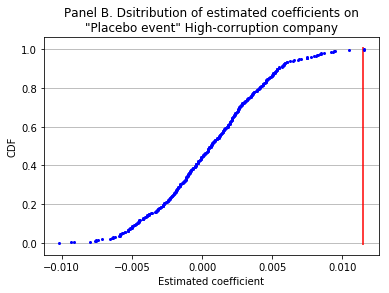

In [19]:
#Gamma_D
plt.figure()
plt.plot(liste_cdf_h,'ro',color="blue",markersize=2)
plt.vlines(x = 0.0115 , color ="r",ymin=-0.01,ymax=1.01)
plt.grid(axis='y')
plt.title('Panel B. Dsitribution of estimated coefficients on\n"Placebo event" High-corruption company')
plt.ylabel("CDF")
plt.xlabel("Estimated coefficient")

Benchmark model is regressed on future abnormal returns and lagged past returns for 200 days to understand whether there is an omitted variable between the events and stock returns. Panel A is the cumulative distribution function of an estimated $\hat{\gamma}$ coefficient. Red line indicates the estimated coefficient for Specification 1 in the benchmark table. As can be seen, only a small share (1.8 percent) of placebo coefficients are smaller or equal to $\hat{\gamma}$. In Panel B, the same analysis is conducted for $\hat\gamma_{D}$ and similarly, 0.2 percent of place coefficients is greater or equal to $\hat\gamma_{D}$.

## Average Treatment Effect

### Model

Authors utilize an infinite-period model in which arm manufacturing companies faces two different states; Embargo $E$, Non-Embargo $N$ and demand for arms $\alpha$ in each state. Transition probability between states E and N is modelled as a Markov Chain. $P_{i,t}(\alpha_{t})$ the probability of transitioning from state $i \in \{E,N\}$ at time t to state $j \in \{E,N\}$ at $
t+$1. Future probability of embargo depends on the current state of hostilities and it is assumed that if a country is under embargo, probability of embargo is higher than non-embargo in the next period.<br>
The demand for arms, drawn in each period t from c.d.f. F and $F_{e}(\alpha_{t}) \leqslant F_{e}(\alpha_{t})$. The demand for arms $\alpha_{t}$ is assumed to be i.i.d over time for simplifying purposes.<br>

The continution payoff of state j as follows;<br>
$(1) \ \ \ V_{j}(\alpha_{j}) = \pi_{j}(\alpha_{t}) + \delta [P_{j,E}(\alpha_{t})V_{E}+ (1-P_{j,E}(\alpha_{t}))V_{N}] \ \ j\in\{E,N\} $<br>
$\pi_{j}(\alpha_{t})$ = Current Profit<br>

The expected continuous payoffs;<br>
$V_{E} = \int V_{E}(\alpha) dF_{E}(\alpha)$<br>
$V_{N}= \int (\alpha)dF_{N}(\alpha)$<br>

Integrating $(1)$ w.r.t $dF_{j}$ yields;<br>
$(2) \ \ \ V_{j} = E\pi_{j} + \delta [EP_{j,E}V_{E}+ (1-EP_{j,E})V_{N}] \ \ j\in\{E,N\}$<br>

Expected profit defined as;<br>
$E\pi_{j} = \int \pi_{j}(\alpha)dF_{j}(\alpha)$<br>

Expected Probabilities of transition;<br>
$EP_{j,E} = \int P_{j,E}(\alpha)dF_{j}(\alpha)$

Using $(2)$;<br>
$V_{E} - V_{N} = \frac{E\pi_{E}-E\pi_{N}}{1-\delta(EP_{E,E}-EP_{N,E})}$<br>
Differentiating (1) w.r.t. $\alpha_{t}$ and substituting in the expression for $V_{E}-V_{N}$ gives;<br>
$(3)\ \ \ \frac{\partial V_{j}(\alpha_{t})}{\partial\alpha_{t}} = \pi_{j}^{'}(\alpha_{t}) + \delta P_{j,E}^{\prime}(\alpha_{t})
\frac{E\pi_{E}-E\pi_{N}}{1-\delta (EP_{E,E}-EP_{N,E})} \ \ j\in\{E,N\}$<br>

With using Cournot Competition model, profits of high-cost of embargo violation and low-cost of embargo violation companies can be considered as follows;<br>
in the Non-Embargo state $\pi_{N}^{H} = \pi_{N}^{L} = \pi_{N}$<br>
in Embargo state $\pi_{E}^{H}=0$ and $\pi_{E}^{L}>\pi_{N}$<br>

From $(3)$ in Embargo state:<br>
for high-cost companies $\partial V_{E}^{H}/\partial \alpha_{t}$ equals to;<br>
$(4)\ \ \ dV_{E}^{H} = - \delta (P_{E,E}^{'}(\alpha_{t})d\alpha_{t})\frac{E\pi_{N}}{1-\delta (EP_{E,E}-EP_{N,E})} \leqslant0$<br>
for low-companies $\partial V_{E}^{L}/\partial \alpha_{t} - \partial V_{E}^{H}/\partial \alpha_{t}$ equals to;<br>
$(5)\ \ \ dV_{E}^{L}-dV_{E}^{H} = \pi_{E}^{L}(\alpha_{t}) \frac{d\alpha_{t}}{\alpha_{t}} + \delta (P_{E,E}^{'}(\alpha_{t})d\alpha_{t})\frac{E\pi_{E}^{L}}{1-\delta (EP_{E,E}-EP_{N,E})} > 0 $<br>

For events in Non-Embargo state:<br>
$(6)\ \ \ dV_{N}^{H} = \pi_{N}(\alpha_{t}) \frac{d\alpha_{t}}{\alpha_{t}} - \delta (P_{N,E}^{'}(\alpha_{t})d\alpha_{t})\frac{E\pi_{N}}{1-\delta (EP_{E,E}-EP_{N,E})} \gtrless0$<br>
$(7)\ \ \ dV_{N}^{L}-dV_{N}^{H} =  \delta (P_{N,E}^{'}(\alpha_{t})d\alpha_{t})\frac{E\pi_{E}^{L}}{1-\delta (EP_{E,E}-EP_{N,E})} > 0 $<br>

### Calibration

#### Embargo probabilities as a function of previous embargo state

In [20]:
#
def lag_gen(data,k):
    data_u = data.unstack("Country")
    for x in ["embargo","eve","evn"]:
        a = data_u[x].shift(periods = k)
        a = a.stack("Country").unstack("year").stack()
        data[ x + "m1" ] = a
    return data

df= pd.read_csv('data/TransProb.csv')
df = pd.wide_to_long(df,["emb","eve","evn"], i = "Country", j ="year")
df = df.rename(columns={"emb":"embargo"})
df = df.fillna(value = 0)
df = lag_gen(df,1)

cont = np.mean(df.loc[(df["embargom1"]== 1)]["embargo"])
print("Chance of staying in embargo: ",round(cont,5)*100,"%")
emb_get = np.mean(df.loc[(df["embargom1"]== 0)]["embargo"])
print("Chance of getting an embargo: ",round(emb_get,5)*100,"%")

Chance of staying in embargo:  92.771 %
Chance of getting an embargo:  4.348 %


From above results $E\hat{P}_{E,E} = 0.928$ and $E\hat{P}_{N,E} = 0.043$

In [21]:
#Embargo probabilities as a function of events in previous year
desc_emb = np.mean(df.loc[df["evem1"]==-1,"embargo"])
#print("Chance of getting an embargo with an important or unexpected decreasing hostility last year: ",round(desc_emb,5)*100,"%")
esc_emb = np.mean(df.loc[df["evem1"]==1,"embargo"])
#print("Chance of getting an embargo with an important or unexpected escalating situation last year: ",round(esc_emb,5)*100,"%")
non_emb = np.mean(df.loc[(df["evem1"]==0) & (df["embargom1"] == 1) ]["embargo"])
#print("Chance of staying in embargo without a significant or unexpected situation last year: ",round(non_emb,5)*100,"%")
desc_emb = np.mean(df.loc[(df["evnm1"]==-1) & (df["embargom1"] == 0)]["embargo"])
#print("Chance of getting an embargo with an escalating situation last year: ",round(desc_emb,5)*100,"%")
esc_emb = np.mean(df.loc[(df["evnm1"]==1) & (df["embargom1"] == 0)]["embargo"])
#print("Chance of getting an embargo with decreasing hostility last year: ",round(esc_emb,5)*100,"%")
nnon_emb = np.mean(df.loc[(df["evnm1"]==0) & (df["embargom1"] == 0) ]["embargo"])
#print("Chance of getting an embargo without a significant situation last year: ",round(nnon_emb,5)*100,"%")

#### Probit specification for effect of conflict events on Embargo probabilities

In [22]:
#
evem1_dec = df.loc[(abs(df["evem1"])==1) | (df["embargom1"] == 1),"evem1"]
evem1_dec = np.array(evem1_dec).reshape(len(evem1_dec),1)
embargo1_dec = df.loc[(abs(df["evem1"])==1) | (df["embargom1"] == 1),"embargo"]
embargo1_dec = np.array(embargo1_dec).reshape(len(embargo1_dec),1)
prob_model1 = pysal.model.spreg.probit.Probit(embargo1_dec,evem1_dec,scalem='xmean' , name_x=["Escalating Event"] ,name_y="embargo")
#print(prob_model1.summary)
print("The marginal impact of escalating suprise event in the previous period to maintain an embargo is " + 
      str(round(float(prob_model1.slopes),3)) + "(standard error " + str(round(float(prob_model1.slopes_std_err),3)) + ")")
evnm1_dec = df.loc[(abs(df["evnm1"])==1) | (df["embargom1"] == 0),"evnm1"]
evnm1_dec = np.array(evnm1_dec).reshape(len(evnm1_dec),1)
embargo0_dec = df.loc[(abs(df["evnm1"])==1) | (df["embargom1"] == 0),"embargo"]
embargo0_dec = np.array(embargo0_dec).reshape(len(embargo0_dec),1)
prob_model2 = pysal.model.spreg.probit.Probit(embargo0_dec,evnm1_dec,scalem='xmean',name_x=["Deescalating event"], name_y = "embargo")
#print(prob_model2.summary)
print("The marginal impact of escalating suprise event in the previous period to get an embargo is " + 
      str(round(float(prob_model2.slopes),3)) + "(standard error " + str(round(float(prob_model2.slopes_std_err),3)) + ")") 

The marginal impact of escalating suprise event in the previous period to maintain an embargo is 0.1(standard error 0.056)
The marginal impact of escalating suprise event in the previous period to get an embargo is 0.063(standard error 0.032)


Thus, $P_{E,E}^{'}(\alpha)d\alpha_{t} = 0.1$ and $P_{N,E}^{'}(\alpha)d\alpha_{t} = 0,063$ and only missing parameter $d\alpha_{t}/\alpha_{t}$ is assumed to be $0.4$.

Imposing $\pi_{N}(\alpha_{t}) = E\pi_{N},\ \pi_{E}^{L}(\alpha_{t}) = E\pi_{E}^{L}$ and replacing parameters with estimates, it yields $ dV_{E}^{H} = -0.594E\pi_{N} $ and $ dV_{E}^{L}-dV_{E}^{H} = 0.994 E\pi_{E}^{L}$ .<br>
From the benchmark table $d\hat{V}_{E}^{H}$ equals to $-0.0042$ and average market capitilazation is $\$408m$ for companies in low corruption countries, thus, the estimated expected yearly profit in the Non-embargo state $E\hat{\pi}_{N} = \$2.88m$. Same analysis for embargo period gives $E\hat{\pi}_{E}^{L} = \$1.73m$<br>.
All in all, illegal arms trade can provide a company $\$1.73$ which is the average treatment effect when a high-corruption company choose to violate arms embargo in this case since $E\pi_{E}^{H} = 0$ is assumed earlier.


## Extentions

### Event's Importance and Surprise Values Visualization

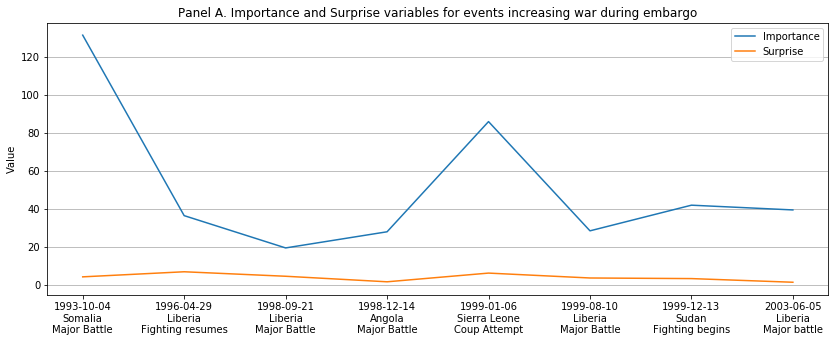

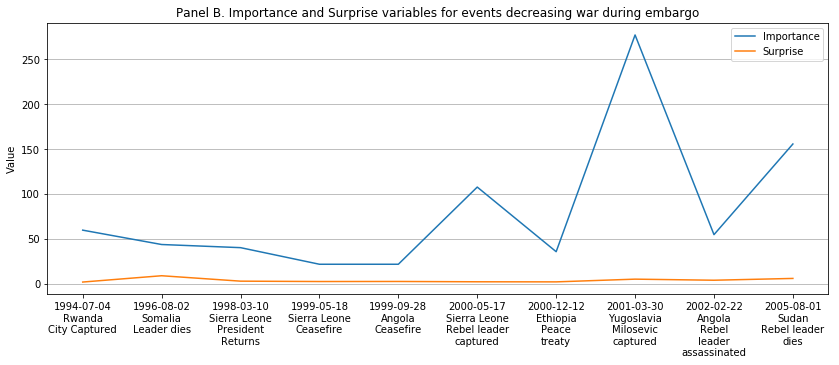

In [23]:
#
#For increasing
inc_dates = ["1993-10-04", "1996-04-29", "1998-09-21", "1998-12-14", "1999-01-06", "1999-08-10", "1999-12-13", "2003-06-05"]
inc = pd.DataFrame(columns=["importance","surprise"])
for i in inc_dates:
    imp = float(data.loc[data["date"]==i,"implx"].unique())
    sur = float(data.loc[data["date"]==i,"unexplx"].unique())
    a = {"importance":imp, "surprise":sur}
    inc = inc.append(a,ignore_index=True)
increasing_exp = {inc_dates[0]:"Somalia\nMajor Battle", inc_dates[1]:"Liberia\nFighting resumes",
                  inc_dates[2]:"Liberia\nMajor Battle", inc_dates[3]:"Angola\nMajor Battle",
                  inc_dates[4]:"Sierra Leone\nCoup Attempt", inc_dates[5]:"Liberia\nMajor Battle",
                  inc_dates[6]:"Sudan\nFighting begins", inc_dates[7]:"Liberia\nMajor battle"}
for x in range(8):
    inc.rename(index = {x: inc_dates[x] +"\n"+ increasing_exp[inc_dates[x]] }, inplace = True)
#For decreasing
decr_dates = ["1994-07-04", "1996-08-02", "1998-03-10", "1999-05-18", "1999-09-28",
              "2000-05-17", "2000-12-12", "2001-03-30", "2002-02-22", "2005-08-01"]
dec = pd.DataFrame(columns=["importance","surprise"])
for i in decr_dates:
    imp = float(data.loc[data["date"]==i,"implx"].unique())
    sur = float(data.loc[data["date"]==i,"unexplx"].unique())
    a = {"importance":imp, "surprise":sur}
    dec = dec.append(a,ignore_index=True)
decreasing_exp = {decr_dates[0]:"Rwanda\nCity Captured", decr_dates[1]: "Somalia\nLeader dies",
                  decr_dates[2]:"Sierra Leone\nPresident\nReturns", decr_dates[3]:"Sierra Leone\nCeasefire",
                  decr_dates[4]:"Angola\nCeasefire", decr_dates[5]:"Sierra Leone\nRebel leader\ncaptured",
                  decr_dates[6]:"Ethiopia\nPeace\ntreaty", decr_dates[7]:"Yugoslavia\nMilosevic\ncaptured",
                  decr_dates[8]:"Angola\nRebel\nleader\nassassinated", decr_dates[9]:"Sudan\nRebel leader\ndies"}
for x in range(10):
    dec.rename(index = {x: decr_dates[x] +"\n"+ decreasing_exp[decr_dates[x]] }, inplace = True)

plt.figure(figsize=[14,5])
plt.title("Panel A. Importance and Surprise variables for events increasing war during embargo")
plt.ylabel('Value')
plt.plot(inc)
plt.legend(labels=["Importance","Surprise"])
plt.grid(axis='y')
plt.figure(figsize=[14,5])
plt.title("Panel B. Importance and Surprise variables for events decreasing war during embargo")
plt.ylabel('Value')
plt.plot(dec)
plt.grid(axis='y')
plt.legend(labels=["Importance","Surprise"])

With inspecting event importance and surprise value, one may suspect that those values can be as proxies, however, as can be seen from the table below, coefficient estimates for those with including them into benchmark table do not yield anything significant.

In [24]:
#Benchmark Table with imp and surp
explanation_main_a = {"evsemb":"Event during embargo (1=increase,-1=decrease,0=no event)",
                    "evsembd2cpi":"Event during embargo(High-corruption country)",
                    "evsembd2nocpi":"Event during embargo(Low-corruption country)",
                    "d2cpi":"High-corruption country indicator", "const":"Constant",
                    "evsemb_imp":"Event indicator interaction with importance",
                    "evsemb_sur":"Event indicator interaction with surprise",
                    "implx":"Event importance", "unexplx":"Event surprise"}
#Benchmark Spec. -- Interact with Corruption Index
data["evsemb_imp"] = data["evsemb"]*data["implx"]
data["evsemb_sur"] = data["evsemb"]*data["unexplx"]
x = data[["evsemb","evsembd2cpi","d2cpi","const","evsemb_imp","evsemb_sur","implx","unexplx"]]
x = x.rename(columns=explanation_main_a)
y = data["aret3ri"]
date = data["date"]
regT11_a = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
#Do only for events
x = data.loc[abs(data["evsemb"])==1, ["evsemb","evsembd2cpi","evsemb_imp","evsemb_sur","implx","unexplx"]]
x = x.rename(columns = explanation_main_a)
y = data.loc[abs(data["evsemb"])==1, "aret3ri"]
date = data.loc[abs(data["evsemb"])==1,"date"]
regT12_a = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

#Do for Corrupt and non-Corrupt
x = data[["evsembd2cpi","evsembd2nocpi","d2cpi","const","evsemb_imp","evsemb_sur","implx","unexplx"]]
x = x.rename(columns=explanation_main_a)
y = data["aret3ri"]
date = data["date"]
regT13_a = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)

table1_a = summary2.summary_col([regT11_a,regT12_a,regT13_a],stars = True,
                              regressor_order=["Event during embargo (1=increase,-1=decrease,0=no event)",
                                               "Event during embargo(High-corruption country)",
                                               "Event during embargo(Low-corruption country)",
                                               "High-corruption country indicator",
                                               "Event indicator interaction with importance",
                                               "Event indicator interaction with surprise",
                                               "Event importance","Event surprise","Constant"],
                              info_dict={'Observations':lambda x: "{:,}".format(int(x.nobs))},
                              model_names = ['(1)','(2)','(3)'])
table1_a.add_title("Stock Market Reaction to War Events with importance and surprise as proxies")

print(table1_a)


    Stock Market Reaction to War Events with importance and surprise as proxies
                                                            (1)      (2)      (3)   
------------------------------------------------------------------------------------
Event during embargo (1=increase,-1=decrease,0=no event) -0.0020   -0.0017          
                                                         (0.0038)  (0.0038)         
Event during embargo(High-corruption country)            0.0114*** 0.0114** 0.0094**
                                                         (0.0041)  (0.0042) (0.0048)
Event during embargo(Low-corruption country)                                -0.0020 
                                                                            (0.0038)
High-corruption country indicator                        -0.0001            -0.0001 
                                                         (0.0002)           (0.0002)
Event indicator interaction with importance              0.0000    -0.

### Inspection of odd behaviour among companies

In [25]:
#
detec = pd.DataFrame(columns=["compname","coef","corruption","indicator"])
mark = 1
for i in (data["compname"].unique()):
    y = data.loc[data["compname"]== i,"aret3ri"]
    x = data.loc[data["compname"]== i,["const","evsemb"]]
    date = data.loc[data["compname"]== i,"date"]
    reg = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
    if (float(reg.pvalues[1]) <= 0.1):
        a = pd.DataFrame({"compname":i,"coef":reg.params["evsemb"],
                          "corruption":data.loc[data["compname"]==i,"d2cpi"].unique()})
        mark = mark + 1
        if ((a["corruption"][0]==1) & (a["coef"][0]<0)):
            a["indicator"] = "Potential corrupt non-violator"
            detec = detec.append(a,ignore_index = True)
            a = None
        if ((a["corruption"][0]==0) & (a["coef"][0]>0)):
            a["indicator"] = "Potential non-corrupt violator"
            detec = detec.append(a,ignore_index = True)
            a = None
#detec

C:\Users\Balaban\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Balaban\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Balaban\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Balaban\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Graphical representation

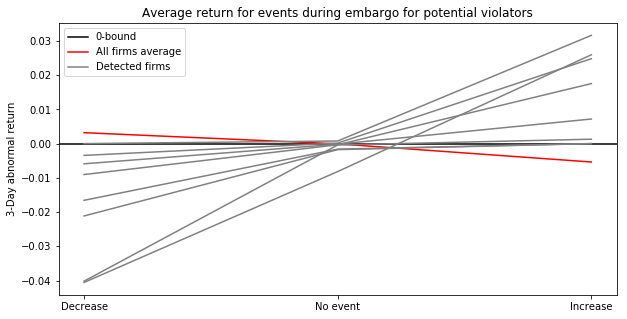

In [26]:
#
plt.figure(figsize=(10,5))
plt.axhline(y = 0 ,color = 'black')
plt.title('Average return for events during embargo for potential violators')
plt.ylabel('3-Day abnormal return')
plt.plot(values_low_cor,color = 'red')
for _ in detec["compname"]:
    x = data.loc[data["compname"]== _ , ["dm1evsembd2nocpi", "d0evsembd2nocpi", "dp1evsembd2nocpi"]]
    y = data.loc[data["compname"]== _ , "aret3ri"]
    date = data.loc[data["compname"]== _ , "date"]
    locals()["reg"+_] = statsmodels.formula.api.OLS(y,x).fit(cov_type= 'cluster',cov_kwds={'groups':date},use_t = True)
    values = locals()["reg"+ _].params
    values_low_corrupt_comp = pd.DataFrame(values[["dm1evsembd2nocpi","d0evsembd2nocpi","dp1evsembd2nocpi"]]).transpose()
    col_low_cor = {"dm1evsembd2nocpi":"Decrease","d0evsembd2nocpi":"No event","dp1evsembd2nocpi":"Increase"}
    values_low_comp= values_low_corrupt_comp.rename(columns = col_low_cor ).transpose()
    plt.plot(values_low_comp,color = 'grey',)

plt.legend(labels=["0-bound","All firms average","Detected firms"])


When the analysis is conducted firm by firm, 8 companies assumed to be non-corrupt due to CPI-based selection have statistically significant coefficient estimates for event responses, this indicates that those companies act as if they belong to the corrupt group. In the paper, it is stated that with observing a smaller number of events, detection of individual companies may not be feasible and accurate, thus, no company name is mentioned in the paper and here.

### Critical Assesment

As a return based analysis, this paper tries to measure the illegal arms trade with utilizing conflicts as determinants. In the overall analysis, such proxies have significant explanatory power on the stock market return of companies especially when conflicts in countries under arms embargo are considered and companies are examined in line with the Corruption Perception Index. Despite such methodology have compelling indications at the global level, inadequacy for detecting violations at company level fairly seems a considerable drawback.

On the other hand, the investigation of arms embargo violations depend on national governments, thus, evidence for detecting illegal arms trade is insufficient (Bondi 2004). Using events as proxies for such detection can be an alternative way for investigation purposes. Although individual company based analysis is inadequate and cannot be used as conclusive evidence, the return based methodology proposed in the paper can pinpoint the areas to examine in greater extent. Besides, as a policy evaluation method, it can be seen that arms embargoes create differences among companies and especially for low-corruption country-based companies illegal arms trade is discouraged.

It is also claimed that stock market prices follow a random walk from time to time (Fama 1995). Even if controlling for market return and averaging preceding and following days' returns may not be sufficient to remove the effect of lagged dependence. As can be seen from the regression tables all regressions used in the paper suffers from autocorrelation. After utilizing several tests including Breusch Pagan for heteroskedasticity, it can be seen that residuals are also heteroskedastic. In the replication process, lagged variables are tried to be included in the regressors and GARCH models tried to be used, however, when the main analysis is under consideration, such extension seemed irrelevant, since all regressions are conducted with clustered robust standard errors.

The original analysis was conducted using STATA software. In the replication process, all of the estimates are reproduced the same as the paper and the names of variables are tried to be same with the replication guidelines supplied by authors. Only two parts of the paper were not reproduced including the company identification part and external validation of results. This is due to the code for company based analysis was not available in the guidelines and the data for external validation was not accessible. I wanted to create a new dataset to test the claims and the results, but, accessing the event importance and surprise values were unattainable and without the dates for conflicts analysis would not yield accurate results.

## References

Bondi, Loretta. 2004. “Externalities of the Arms Trade.” In It’s Legal but It Ain’t Right, ed. Nikos Passas and Neva Goodwin, 43–73. Ann Arbor, MI: University of Michigan Press.<br>
Dunne, J. Paul, and Eamon Surry. 2006. "Arms Production." In SIPRI Yearbook 2006: Armaments, Disarmament and International Security, 387–418. Oxford, UK: Oxford University Press.<br>
Fama, E. F. 1995. "Random walks in stock market prices." Financial analysts journal, 51(1), 75-80.<br>
Kaufmann, Daniel, Aart Kraay, and Massimo Mastruzzi. 2006. “Governance Matters V: Aggregate and Individual Governance Indicators for 1996–2005.” World Bank Policy Research Working Paper 4012.<br>
Djankov, Simeon, Rafael La Porta, Florencio Lopez-de-Silanes, and Andrei Shleifer. 2008. “The Law and Economics of Self-Dealing.” Journal of Financial Economics, 88(3): 430–65.<br>